<a href="https://colab.research.google.com/github/MISHTI100/th_LightGBM/blob/main/th_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving th_1.xlsx to th_1.xlsx


In [3]:
from google.colab import files

uploaded = files.upload()

Saving th_2.xlsx to th_2.xlsx


In [4]:
from google.colab import files

uploaded = files.upload()

Saving th_3.xlsx to th_3.xlsx


In [5]:
from google.colab import files

uploaded = files.upload()

Saving th_4.xlsx to th_4.xlsx


In [6]:
from google.colab import files

uploaded = files.upload()

Saving th_5.xlsx to th_5.xlsx


In [7]:
from google.colab import files

uploaded = files.upload()

Saving th_6.xlsx to th_6.xlsx


In [8]:
from google.colab import files

uploaded = files.upload()

Saving th_7.xlsx to th_7.xlsx


In [9]:
from google.colab import files

uploaded = files.upload()

Saving th_8.xlsx to th_8.xlsx


In [10]:
from google.colab import files

uploaded = files.upload()

Saving th_9.xlsx to th_9.xlsx


In [11]:
from google.colab import files

uploaded = files.upload()

Saving th_10.xlsx to th_10.xlsx


In [12]:
from google.colab import files

uploaded = files.upload()

Saving th_12.xlsx to th_12.xlsx


In [13]:
from google.colab import files

uploaded = files.upload()

Saving th_11.xlsx to th_11.xlsx


In [14]:
from google.colab import files

uploaded = files.upload()

Saving th_13.xlsx to th_13.xlsx


In [15]:
from google.colab import files

uploaded = files.upload()

Saving th_14.xlsx to th_14.xlsx


In [16]:
from google.colab import files

uploaded = files.upload()

Saving th_15.xlsx to th_15.xlsx


In [17]:
from google.colab import files

uploaded = files.upload()

Saving th_16.xlsx to th_16.xlsx


In [18]:
from google.colab import files

uploaded = files.upload()

Saving th_17.xlsx to th_17.xlsx


In [19]:
from google.colab import files

uploaded = files.upload()

Saving th_18.xlsx to th_18.xlsx


In [20]:
from google.colab import files

uploaded = files.upload()

Saving th_19.xlsx to th_19.xlsx


In [21]:
from google.colab import files

uploaded = files.upload()

Saving th_20.xlsx to th_20.xlsx


In [22]:
from google.colab import files

uploaded = files.upload()

Saving th_21.xlsx to th_21.xlsx


In [23]:
from google.colab import files

uploaded = files.upload()

Saving th_22.xlsx to th_22.xlsx


In [24]:
from google.colab import files

uploaded = files.upload()

Saving th_23.xlsx to th_23.xlsx


In [25]:
import pandas as pd


filenames = ['th_1.xlsx', 'th_2.xlsx', 'th_3.xlsx', 'th_4.xlsx', 'th_5.xlsx', 'th_6.xlsx', 'th_7.xlsx', 'th_8.xlsx', 'th_9.xlsx', 'th_10.xlsx', 'th_11.xlsx', 'th_12.xlsx', 'th_13.xlsx', 'th_14.xlsx', 'th_15.xlsx', 'th_16.xlsx', 'th_17.xlsx', 'th_18.xlsx', 'th_19.xlsx', 'th_20.xlsx', 'th_21.xlsx', 'th_22.xlsx', 'th_23.xlsx']


df = pd.concat([pd.read_excel(file) for file in filenames], ignore_index=True)


df.head()

,timestamp,name,location,Temperature,Humidity,energy
0,"April 1, 2025 at 12:01:51 AM",Sensor 1,20tr,22,39,2882796.75
1,"April 1, 2025 at 12:03:51 AM",Sensor 1,20tr,22,39,2882796.75
2,"April 1, 2025 at 12:05:51 AM",Sensor 1,20tr,22,39,2882796.75
3,"April 1, 2025 at 12:07:51 AM",Sensor 1,20tr,22,39,2882796.75
4,"April 1, 2025 at 12:09:51 AM",Sensor 1,20tr,22,39,2882796.75


In [26]:
df.tail()

,timestamp,name,location,Temperature,Humidity,energy
467780,"May 30, 2025 at 11:51:41 PM",Sensor 5,20tr,26,52,4992683.0
467781,"May 30, 2025 at 11:53:41 PM",Sensor 5,20tr,26,52,4992683.0
467782,"May 30, 2025 at 11:55:41 PM",Sensor 5,20tr,26,53,4992683.0
467783,"May 30, 2025 at 11:57:41 PM",Sensor 5,20tr,26,53,4992683.0
467784,"May 30, 2025 at 11:59:41 PM",Sensor 5,20tr,25,55,4992683.0


In [27]:
df.drop(columns=['timestamp', 'location', 'name'], inplace=True, errors='ignore')

In [28]:
df.head()

,Temperature,Humidity,energy
0,22,39,2882796.75
1,22,39,2882796.75
2,22,39,2882796.75
3,22,39,2882796.75
4,22,39,2882796.75


In [29]:
df.tail()

,Temperature,Humidity,energy
467780,26,52,4992683.0
467781,26,52,4992683.0
467782,26,53,4992683.0
467783,26,53,4992683.0
467784,25,55,4992683.0


In [30]:
df = df[df[df.columns[2]].notnull()]
df = df[df[df.columns[2]] != 0]

In [31]:
X = df.drop(df.columns[2], axis=1)
y = df.iloc[:, 2]

In [32]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
X = df[['energy', 'Humidity']].values
y = df['Temperature'].values

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (465435, 2)
Target shape: (465435,)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 372348
Test size: 93087


In [36]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.9358603358268738
MSE: 2.291410446166992
RMSE: 1.5137405478373738
R² Score: 0.9477812051773071


In [38]:
min_energy = df['energy'].min()
max_energy = df['energy'].max()
avg_energy = df['energy'].mean()
avg_humidity = df['Humidity'].mean()

samples = np.array([
    [min_energy, avg_humidity],
    [max_energy, avg_humidity],
    [avg_energy, avg_humidity]
])

samples_scaled = scaler.transform(samples)
predictions = model.predict(samples_scaled)

print(f"Predicted Temperature for Minimum Energy ({min_energy:.2f}): {predictions[0]:.2f}")
print(f"Predicted Temperature for Maximum Energy ({max_energy:.2f}): {predictions[1]:.2f}")
print(f"Predicted Temperature for Average Energy ({avg_energy:.2f}): {predictions[2]:.2f}")


Predicted Temperature for Minimum Energy (872006.62): 22.89
Predicted Temperature for Maximum Energy (13418084.00): 26.16
Predicted Temperature for Average Energy (5967685.00): 27.60


In [39]:
energy_value = 5000000
humidity_value = 55

sample = np.array([[energy_value, humidity_value]])
sample_scaled = scaler.transform(sample)

predicted_temp = model.predict(sample_scaled)
print(f"Predicted Temperature: {predicted_temp[0]:.2f}")


Predicted Temperature: 24.64


In [40]:
energy_value = 4800000
humidity_value = 60

sample = np.array([[energy_value, humidity_value]])
sample_scaled = scaler.transform(sample)

predicted_temp = model.predict(sample_scaled)
print(f"Predicted Temperature: {predicted_temp[0]:.2f}")


Predicted Temperature: 28.42


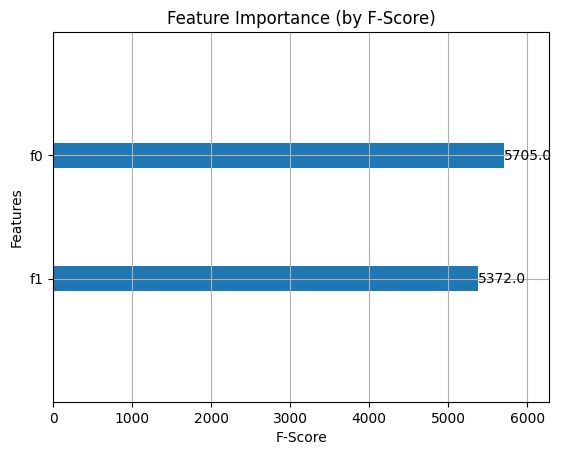

In [41]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, importance_type='weight', xlabel='F-Score')
plt.title("Feature Importance (by F-Score)")
plt.show()

In [47]:
from lightgbm import LGBMRegressor


In [48]:
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [49]:
X = df[['Humidity', 'energy']]
y = df['Temperature']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 372348, number of used features: 2
[LightGBM] [Info] Start training from score 28.691925


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


MAE: 1.0507825295375106
MSE: 2.5504584891767674
RMSE: 1.5970154943446127
R² Score: 0.9418777494230824


In [51]:
print(df.columns)


Index(['Temperature', 'Humidity', 'energy'], dtype='object')


In [52]:
min_energy = df['energy'].min()
max_energy = df['energy'].max()
avg_energy = df['energy'].mean()
random_energy = np.random.choice(df['energy'])

avg_humidity = df['Humidity'].mean()

test_cases = pd.DataFrame({
    'Humidity': [avg_humidity, avg_humidity, avg_humidity, avg_humidity],
    'energy': [min_energy, max_energy, avg_energy, random_energy]
})

test_scaled = scaler.transform(test_cases)

predictions = lgb_model.predict(test_scaled)

print("\nLightGBM Predictions for Temperature:")
print(f"At Min Energy ({min_energy}): {predictions[0]:.2f}")
print(f"At Max Energy ({max_energy}): {predictions[1]:.2f}")
print(f"At Avg Energy ({avg_energy}): {predictions[2]:.2f}")
print(f"At Random Energy ({random_energy}): {predictions[3]:.2f}")



LightGBM Predictions for Temperature:
At Min Energy (872006.62): 23.85
At Max Energy (13418084.0): 26.82
At Avg Energy (5967684.995343798): 27.36
At Random Energy (3388539.25): 26.40


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


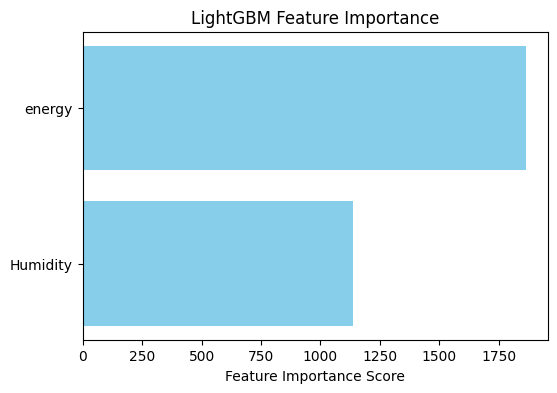

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

importance = lgb_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6,4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()
